In [2]:
# POINT OPERATIONS II -- WEEK 4
import cv2
import numpy as np
import matplotlib.pyplot as plt

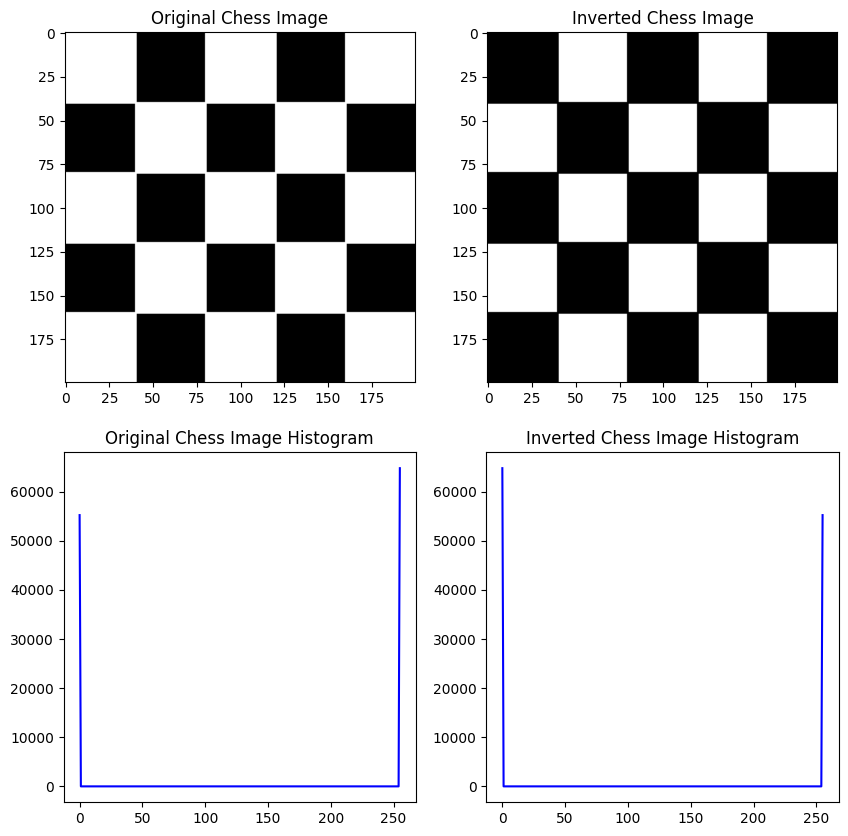

In [23]:
# TASK 1: Invert the image
chessImgPath = "images/week4/chess.png"
originalChessImage = cv2.imread(chessImgPath, cv2.IMREAD_COLOR)
originalChessImage = cv2.cvtColor(originalChessImage, cv2.COLOR_BGR2RGB)
histOri, _ = np.histogram(originalChessImage.flatten(), bins=256, range=[0, 256])

epsilon = 1e-5  # to avoid division by zero --> runtime error
invertChessImage = 255.0 / (originalChessImage + epsilon)
invertChessImage = np.clip(invertChessImage, 0, 255).astype(np.uint8)
histInvert, _ = np.histogram(invertChessImage.flatten(), bins=256, range=[0, 256])

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(originalChessImage)
axs[0, 0].set_title("Original Chess Image")
axs[0, 1].imshow(invertChessImage)
axs[0, 1].set_title("Inverted Chess Image")
axs[1, 0].plot(histOri, color='b')
axs[1, 0].set_title("Original Chess Image Histogram")
axs[1, 1].plot(histInvert, color='b')
axs[1, 1].set_title("Inverted Chess Image Histogram")
plt.show()

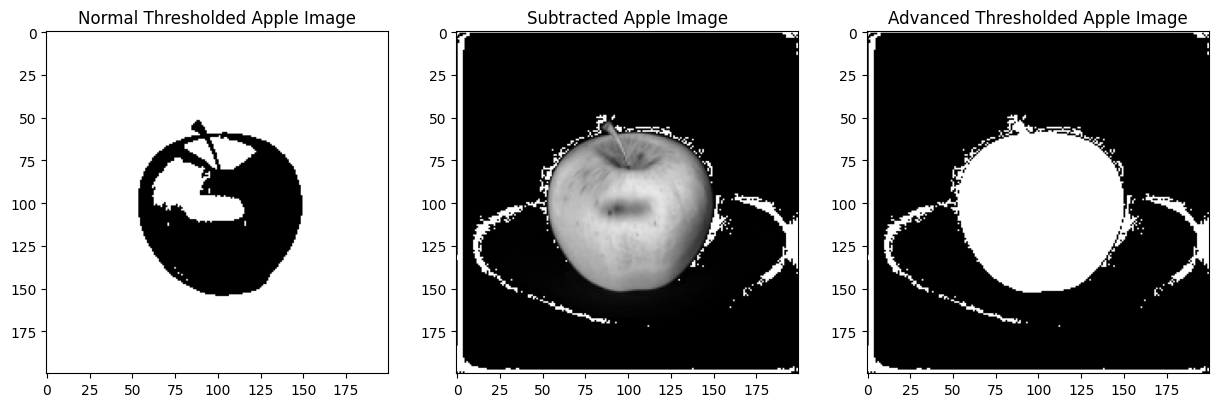

In [27]:
# TASK 2: Thresholding
appleImgPath = "images/week4/apple.png"
# -- thresholding constants: I used the same threshold values for AIThaiGen
constNormalThreshold = [132, 255]
constAdvThreshold = [20, 255]

originalAppleImage = cv2.imread(appleImgPath, cv2.IMREAD_COLOR)
originalAppleImage = cv2.cvtColor(originalAppleImage, cv2.COLOR_BGR2RGB)
grayAppleImage = cv2.cvtColor(originalAppleImage, cv2.COLOR_RGB2GRAY)
grayAppleImage = grayAppleImage.astype(np.float32)

# -- normal thresholding
_, normalThresholdedAppleImage = cv2.threshold(grayAppleImage, constNormalThreshold[0], constNormalThreshold[1], cv2.THRESH_BINARY)
normalThresholdedAppleImage = np.clip(normalThresholdedAppleImage, 0, 255).astype(np.uint8)

# -- more advanced thresholding: split RGB components --> subtract B from R --> thresholding
appleR, appleG, appleB = cv2.split(originalAppleImage)
appleSubtracted = appleR - appleB
appleSubtracted = np.clip(appleSubtracted, 0, 255).astype(np.uint8)
_, advThresholdAppleImage = cv2.threshold(appleSubtracted, constAdvThreshold[0], constAdvThreshold[1], cv2.THRESH_BINARY)
advThresholdAppleImage = np.clip(advThresholdAppleImage, 0, 255).astype(np.uint8)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(normalThresholdedAppleImage, cmap="gray")
axs[0].set_title("Normal Thresholded Apple Image")
axs[1].imshow(appleSubtracted, cmap="gray")
axs[1].set_title("Subtracted Apple Image")
axs[2].imshow(advThresholdAppleImage, cmap="gray")
axs[2].set_title("Advanced Thresholded Apple Image")
plt.show()

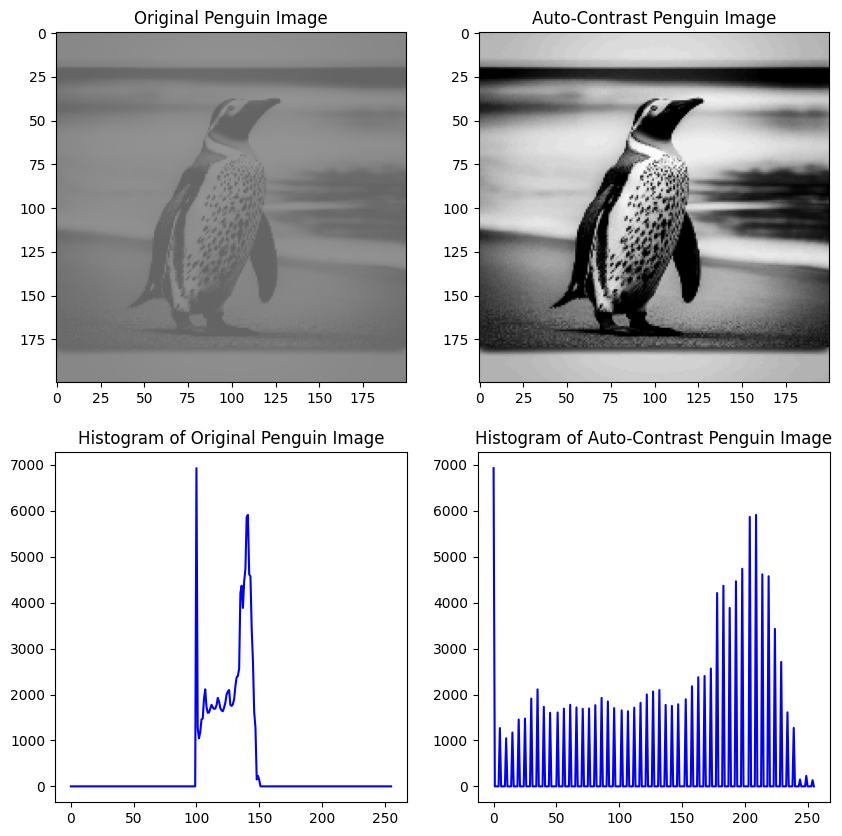

In [29]:
# TASK 3: Automatic-Contrast Adjustment
penGuinPath = "images/week4/penguin.png"
originalPenGuinImage = cv2.imread(penGuinPath, cv2.IMREAD_COLOR)
originalPenGuinImage = cv2.cvtColor(originalPenGuinImage, cv2.COLOR_BGR2RGB)
histOri, bins = np.histogram(originalPenGuinImage.flatten(), 256, [0, 256])

# -- automatic contrast adjustment: f(A) = (A - min(A)) * (255 / (max(A) - min(A)))
minVal = np.min(originalPenGuinImage)
maxVal = np.max(originalPenGuinImage)
autoContrastPenguinImage = (originalPenGuinImage - minVal) * (255 / (maxVal - minVal))
autoContrastPenguinImage = np.clip(autoContrastPenguinImage, 0, 255).astype(np.uint8)
histAuto, bins = np.histogram(autoContrastPenguinImage.flatten(), 256, [0, 256])

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(originalPenGuinImage, cmap="gray")
axs[0, 0].set_title("Original Penguin Image")
axs[0, 1].imshow(autoContrastPenguinImage, cmap="gray")
axs[0, 1].set_title("Auto-Contrast Penguin Image")
axs[1, 0].plot(histOri, color="blue")
axs[1, 0].set_title("Histogram of Original Penguin Image")
axs[1, 1].plot(histAuto, color="blue")
axs[1, 1].set_title("Histogram of Auto-Contrast Penguin Image")
plt.show()

In [ ]:
# TASK 4: Modified Auto-Contrast Adjustment (Quantile-based)
penGuinPath = "images/week4/penguin.png"
originalPenGuinImage = cv2.imread(penGuinPath, cv2.IMREAD_COLOR)
originalPenGuinImage = cv2.cvtColor(originalPenGuinImage, cv2.COLOR_BGR2RGB)
histOri, bins = np.histogram(originalPenGuinImage.flatten(), 256, [0, 256])


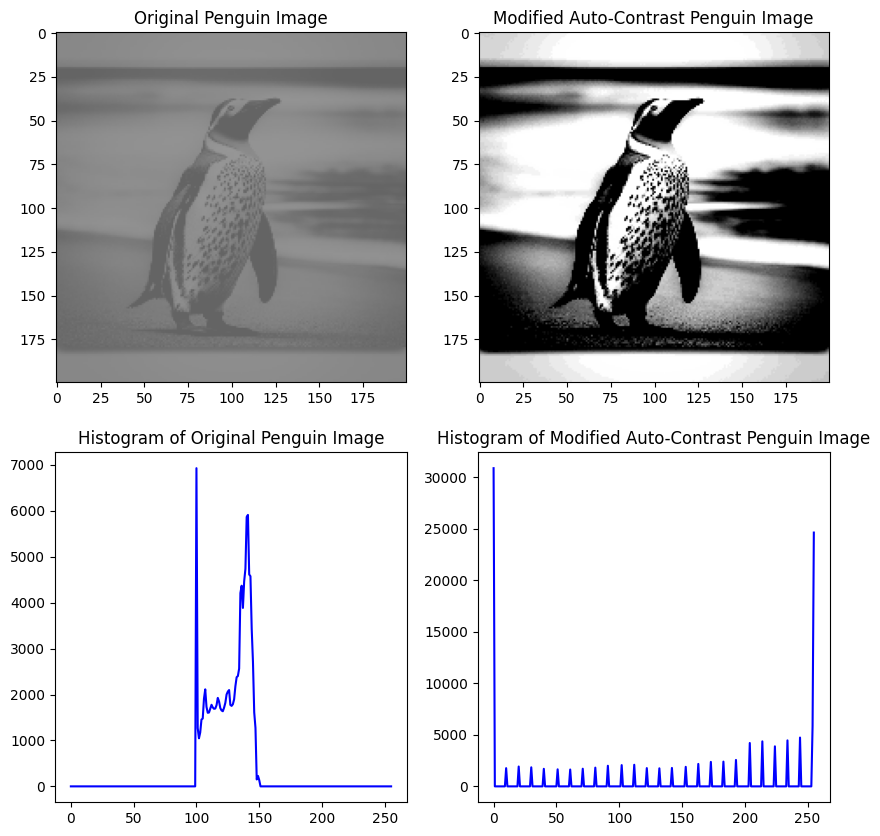

In [32]:
# TASK 4: Modified Auto-Contrast Adjustment (Quantile-based)
penGuinPath = "images/week4/penguin.png"
originalPenGuinImage = cv2.imread(penGuinPath, cv2.IMREAD_COLOR)
originalPenGuinImage = cv2.cvtColor(originalPenGuinImage, cv2.COLOR_BGR2RGB)
histOrig, bins = np.histogram(originalPenGuinImage.flatten(), 256, [0, 256])

# -- modified auto-contrast adjustment: f(A) = (A - min(A)) * (255 / (max(A) - min(A))); where min(A) = 0.25 quantile, max(A) = 0.75 quantile
quantile25 = np.quantile(originalPenGuinImage, 0.25)
quantile75 = np.quantile(originalPenGuinImage, 0.75)
modAutoContrastPenguinImage = (originalPenGuinImage - quantile25) * (255 / (quantile75 - quantile25))
modAutoContrastPenguinImage = np.clip(modAutoContrastPenguinImage, 0, 255).astype(np.uint8)
histModAuto, bins = np.histogram(modAutoContrastPenguinImage.flatten(), 256, [0, 256])

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(originalPenGuinImage, cmap="gray")
axs[0, 0].set_title("Original Penguin Image")
axs[0, 1].imshow(modAutoContrastPenguinImage, cmap="gray")
axs[0, 1].set_title("Modified Auto-Contrast Penguin Image")
axs[1, 0].plot(histOrig, color="blue")
axs[1, 0].set_title("Histogram of Original Penguin Image")
axs[1, 1].plot(histModAuto, color="blue")
axs[1, 1].set_title("Histogram of Modified Auto-Contrast Penguin Image")
plt.show()

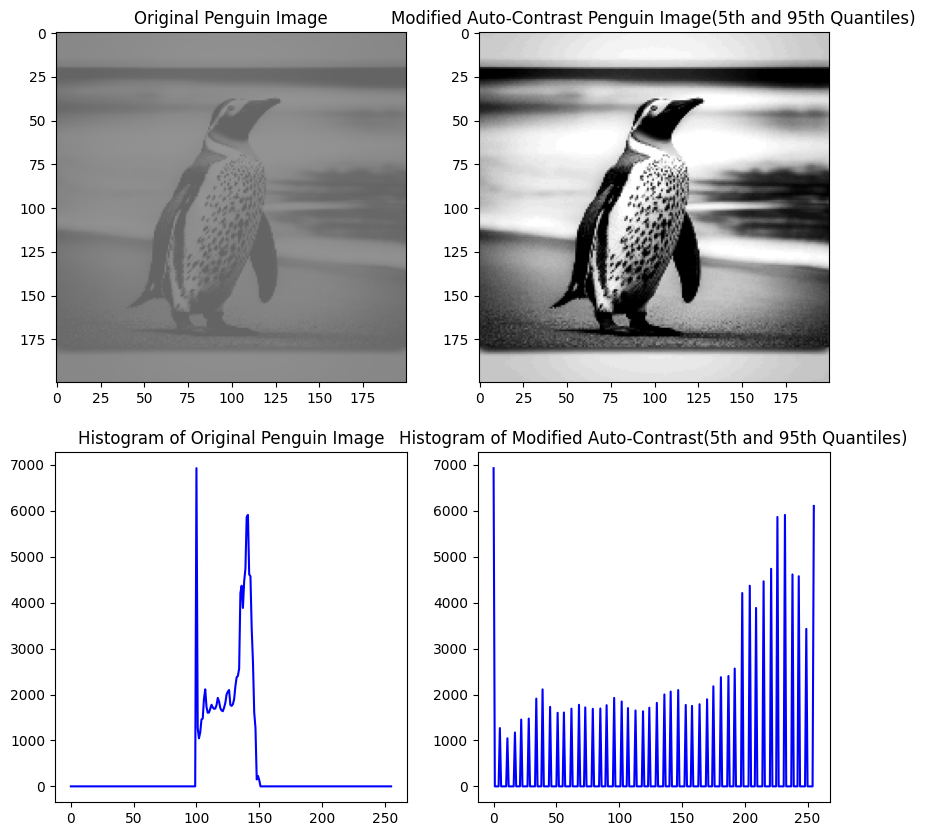

In [38]:
# Calculate less aggressive quantiles
quantile5 = np.quantile(originalPenGuinImage, 0.05)
quantile95 = np.quantile(originalPenGuinImage, 0.95)

# Modified auto-contrast adjustment with 5th and 95th quantiles
modAutoContrastPenguinImage = (originalPenGuinImage - quantile5) * (255 / (quantile95 - quantile5))
modAutoContrastPenguinImage = np.clip(modAutoContrastPenguinImage, 0, 255).astype(np.uint8)
histModAuto, bins = np.histogram(modAutoContrastPenguinImage.flatten(), 256, [0, 256])

# Display the images and histograms
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# add tiles all "0.05 quantile" and "0.95 quantile" to the titles
axs[0, 0].imshow(originalPenGuinImage)
axs[0, 0].set_title("Original Penguin Image")
axs[0, 1].imshow(modAutoContrastPenguinImage)
axs[0, 1].set_title("Modified Auto-Contrast Penguin Image(5th and 95th Quantiles)")
axs[1, 0].plot(histOrig, color="blue")
axs[1, 0].set_title("Histogram of Original Penguin Image")
axs[1, 1].plot(histModAuto, color="blue")
axs[1, 1].set_title("Histogram of Modified Auto-Contrast(5th and 95th Quantiles)")
plt.show()